# Sprint 3 : S03 T02: Visualització gràfica de Múltiples variables

## Análisis del Data frame Tips.csv

In [926]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [927]:
df = pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Sprint3\Sprint3Ex2\Nivel I\tips.csv", sep=",")

In [928]:
df.shape

(244, 7)

In [929]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [930]:
df.describe().round(3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


In [931]:
df.total_bill.mean()

19.785942622950824

In [932]:
print("El dtypes del dataframe son:", end='\n\n')
print(df.dtypes)

El dtypes del dataframe son:

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


#### Convertimos las variables (sex, smoker, day and time)  en variables categóricas.

In [933]:
df['sex']=df['sex'].astype('category') # convert sex to be a categorical value
df['smoker']=df['smoker'].astype('category') # convery smoker to be a categorical value
df['day']=df['day'].astype('category') 
df['time']=df['time'].astype('category') 
print(*df.dtypes)

float64 float64 category category category category int64


In [934]:
print("Tabla de Características de las variables categóricas creadas sobre el Data Frame:\n")
df.describe(include=['category'])

Tabla de Características de las variables categóricas creadas sobre el Data Frame:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


#### Conclusiones:
###### El total de registros es de 244 observaciones
###### Sex: Hay 157 hombres que han pagado sobre las 244 observaciones, por tanto solo 87 mujeres han pagado la factura total
###### Smoker: hay más no-fumadores en el Data Frame con 151 de 244 observationes, mientras que 93 observaciones corresponderían a fumadores
###### Day: El Sábado es el día con mayor frecuencia en el Data Frame
###### Time: The data includes 176 dinners out of 244 meals wuth the remaining 68 meals being lunches.

#### Chequeamos los datos de valor N/A o no informados

In [935]:
print(*df.isna().any()) # Si existen valora N/A retornan como valores booleanos (0 y 1),la suma nos facilita cuántos N/A tenemos

False False False False False False False


###### No existen valores no informados o N/A en el Data Frame

In [936]:
df.sort_values(by='tip').head() # sort by tip size and look at top 5 tip sizes

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2


In [937]:
df.sort_values(by='total_bill', ascending = False).head(3) # sort by total bill amount and then look at top 3 amounts

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


#### Resumen Estadístico de las variables cuántitativas del Data Frame - Tips

In [938]:
df.describe() # get statistics summary of the tips dataframe df

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000



###### La media de factura_total es de 19,79 y 2,99 de propinas, mientras que el número de comensales promedios se sitúa entre 2-3
###### La desviación estándar del total de factura es de 8,90 y de propinas 1,38
###### La factura total mínima es de 3,07 mientras que la máxima es de 50,81. En cuanto a la variable propina, la mínima son 1,00 y la máxima 10,00


## Nivell 1
### Exercici 1
#### Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

##### Porcentaje de Propinas / Factura_total

In [939]:
tips=df
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


##### Gráfico 1 : Porcentaje de propinas/Factura_total por días de la semana

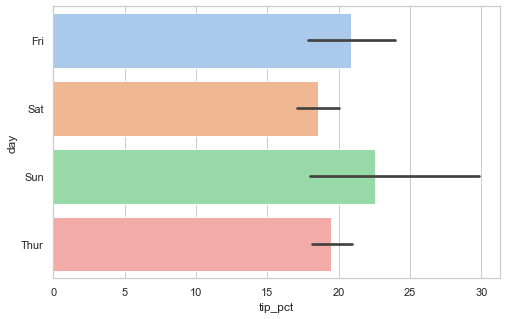

In [940]:
plt.figure(figsize=(8,5))
sns.barplot(x='tip_pct', y='day', data=tips, orient="h", palette= "pastel")
plt.show()

##### Gráfico 2: Porcentaje de propinas/Factura_total por días y "time" (Dinner or Lunch)

###### El domingo es el día de la semana que mayor porcentaje de propinas / Factura _total se obtiene y el sábado es el de memor porcentaje 

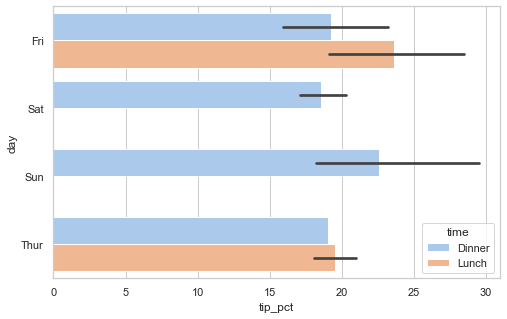

In [941]:
plt.figure(figsize=(8,5))
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', palette="pastel")
plt.show()
sns.set(style="darkgrid")

###### El porcentaje mayor de Propinas/Factura_Total se procuce el viernes cuando desglosamos los datos por "time", siendo la hora de la comida "Lunch" cuando se dan las mayores propinas.

In [942]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [943]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [944]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [945]:
round(tips["tip"].median(),3)

2.9

##### Gráfico 3: BoxPlot de la distribución de las propinas (tips)

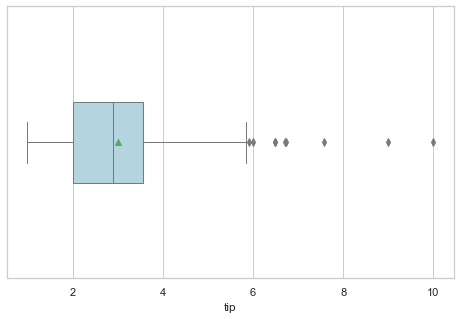

In [946]:
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3, showmeans=True)

###### El 75% de las propinas son inferiores a 4 con uma media de 1,9, aunque existen variables atípicos entre 6 y 10

#### Una Variable: 1 Numérica = 'tip_pct

##### Gráfico 4: BoxPlot del porcentaje de propinas (tip_pct)

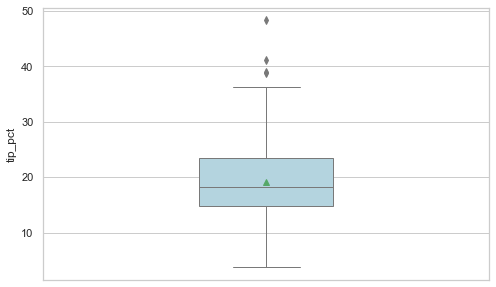

In [947]:
tip_pct_sinOutl = tips[tips.tip_pct<60]
plt.figure(figsize=(8,5))
sns.boxplot(y="tip_pct", data=tip_pct_sinOutl,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, showmeans=True);

###### La media y la mediana del porcentaje son valores muy próximos, en torno al 20%
###### Se han eliminado los outliers superiores al 60%, porque había un porcentaje de propina/Factura_total superior al 250 que distorsionaba el Boxplot

#### Dos Variables: 1 Categórica = 'day', 1 Numérica = 'tip_pct'

##### Gráfico 5: BoxPLot de porcentaje de propinas (tips_pct) por días de la semana

<Figure size 720x576 with 0 Axes>

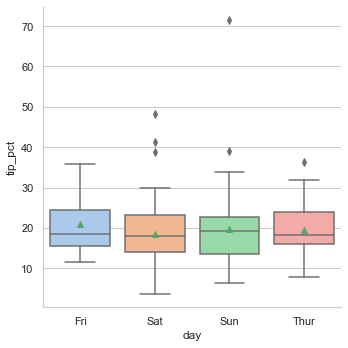

In [948]:
plt.figure(figsize=(10,8))
ax = sns.catplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct<245], showmeans=True, palette ="pastel");

##### Gráfico 6: BoxPlot y datos individuales del porcentaje de propinas (tips_pct) por días y por tiempo de servicio (Dinner, Lunch)

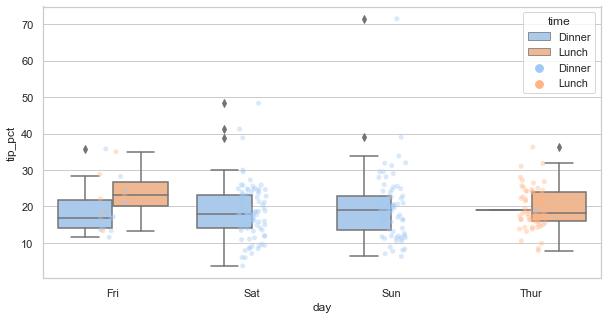

In [949]:
sns.color_palette("pastel")
plt.figure(figsize=(10,5))
sns.boxplot(x='day', y='tip_pct', hue = 'time', data=tips[tips.tip_pct < 245], palette="pastel");
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color="DarkBlue", alpha= 0.4, palette="pastel");

#### Facet Grids y Categorical DataFrame

##### Gráfico 7: BoxPlot de porcentaje de propinas (tips_pct) por días, tiempo de servicio y por Fumadores y no Fumadores

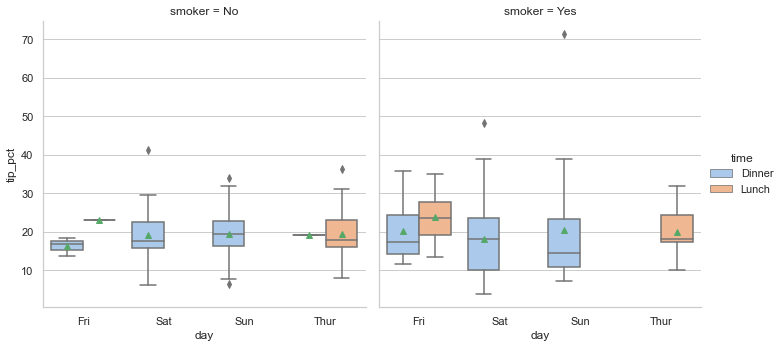

In [950]:
sns.catplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], kind="box", hue="time",col="smoker", palette="pastel", showmeans=True)

##### Gráfico 8: BoxPlot de porcentaje de propinas, por días, tiempo de servicio y sexo

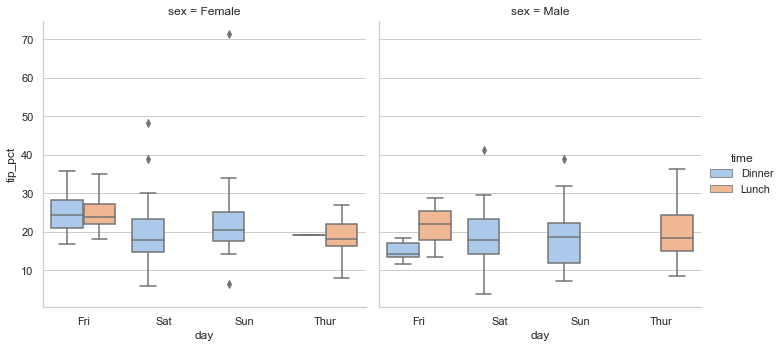

In [951]:
sns.color_palette("pastel")
sns.catplot(x='day', y='tip_pct', hue='time', col='sex', kind='box', data=tips[tips.tip_pct<245], palette="pastel") ;

#### Creamos nuevas variables : Factura total por persona, Propina por Persona y Total importe (suma de total factura y propina)

In [952]:
tips['tbillForPers']=tips['total_bill']/tips['size']
tips['tipForPers']=tips['tip']/tips['size']
tips['total_amount']=tips['total_bill']+tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tbillForPers,tipForPers,total_amount
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32,8.495000,0.505000,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12,3.446667,0.553333,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99,7.003333,1.166667,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25,11.840000,1.655000,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21,6.147500,0.902500,28.20


In [953]:
tips.describe()

,total_bill,tip,size,tip_pct,tbillForPers,tipForPers,total_amount
count,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418,7.88823,1.212762,22.784221
std,8.902412,1.383638,0.951100,16.338588,2.91435,0.491705,9.890116
min,3.070000,1.000000,1.000000,3.700000,2.87500,0.400000,4.070000
25%,13.347500,2.000000,2.000000,14.830000,5.80250,0.862500,15.475000
50%,17.795000,2.900000,2.000000,18.310000,7.25500,1.107500,20.600000
75%,24.127500,3.562500,3.000000,23.682500,9.39000,1.500000,27.722500
max,50.810000,10.000000,6.000000,245.240000,20.27500,3.333333,60.810000


###### La media de las tres nuevas variables creadas son: 7,8 total factura por persona, 1,2 propina por persona y 22,78 de importe total


##### Gráfico 9: Distribución de la factura por persona y el ratio porcentaje propinas

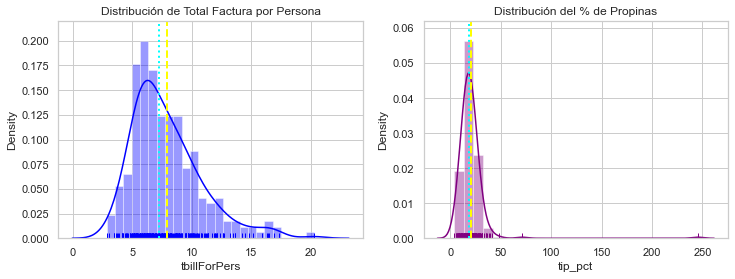

In [956]:
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(12, 4))

# histograma del total de factura
sns.distplot(tips['tbillForPers'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
# límea vertical de la media
axes[0].axvline(tips['tbillForPers'].mean(), color='yellow', linewidth=2, linestyle="--")
# linea vertical de la mediana
axes[0].axvline(tips['tbillForPers'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# título
axes[0].set_title("Distribución de Densidad del Total Factura por Persona")

# histograma de ratio de propinas
sns.distplot(tips['tip_pct'], kde=True, rug=True, ax=axes[1], color="purple", bins=25)
# línea vertical de la media
axes[1].axvline(tips['tip_pct'].mean(), color='yellow', linewidth=2, linestyle="--")
# línea vertical de la mediana
axes[1].axvline(tips['tip_pct'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# título
axes[1].set_title("Distribución del % de Propinas");

##### Gráfico 10: PairPlot muestra las relaciones por pares de todas las variables del Data Frame original



 Pairplot muestra las relaciones entre: total bill, tip and size by sex of bill payer 



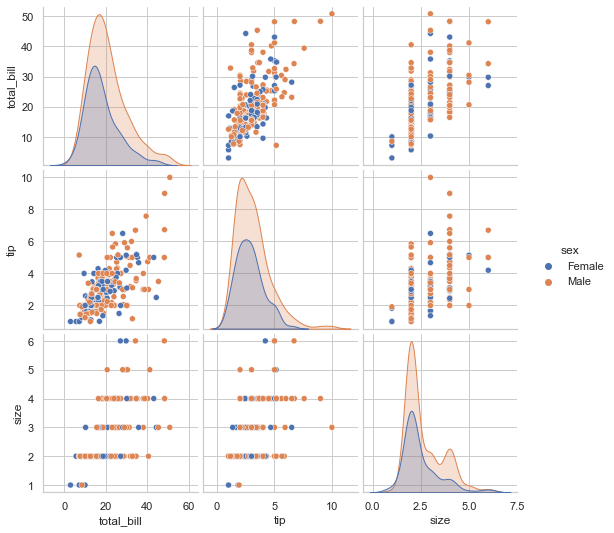

In [957]:
# To just select the original variables of the dataframe and not included the added variables
tips.loc[:, ['total_bill','tip','sex','smoker','size']];
print("\n\n Pairplot muestra las relaciones entre: total bill, tip and size by sex of bill payer \n")
# plot the pairplot using palette defined earlier for hue levels
sns.pairplot(tips.loc[:, ['total_bill','tip','sex','smoker','size']], hue="sex");

## Nivell 2 i Nivell 3
### Exercici 2 i Exercici 3: 
#### Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat
#### Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

#### 2. Análisis del Data frame movies.dat

In [970]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [971]:
df = pd.read_table(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Sprint3\Sprint3Ex2\Nivel II\movies.dat",sep="::", header=None, encoding="latin-1")
df.head(5)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [972]:
df.shape

(3883, 3)

In [973]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [974]:
df.dtypes

0     int64
1    object
2    object
dtype: object

In [975]:
df= df.rename(columns = {0: "id", 1: "Movie", 2: "Genres"}, inplace = False)
df.head(5)

,id,Movie,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### a) Número de Películas

In [976]:
numFilms = df.shape[0]
print("Número de Movies del Data Frame: ", numFilms)

Número de Movies del Data Frame:  3883


#### b) Peridodo Temporal

In [977]:
df['Year']=df["Movie"].str[-5:-1]
df.head(5)

,id,Movie,Genres,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [978]:
df.dtypes

id         int64
Movie     object
Genres    object
Year      object
dtype: object

In [979]:
df['Movie'] = df['Movie'].str[0:-7]
df.head(5)

,id,Movie,Genres,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [980]:
df['Year'] = pd.to_numeric(df['Year'])
df.head()

,id,Movie,Genres,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [981]:
df.dtypes

id         int64
Movie     object
Genres    object
Year       int64
dtype: object

##### b.1) Periodo temporal del Data Frame

In [982]:
yearInc= df['Year'].min()
yearFin = df["Year"].max()
print("Periodo temporal del Data Frame : " ,yearInc," - ", yearFin)

Periodo temporal del Data Frame :  1919  -  2000


##### b.2) Número de películas por años

In [983]:
Year=df["Year"].value_counts()
Year.head(15)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
1990     77
1987     71
1988     69
1985     65
1989     60
Name: Year, dtype: int64

In [984]:
totalFilms= sum(Year)
print("El total de Películas por años es: ",totalFilms)

El total de Películas por años es:  3883


In [985]:
Year.describe()

count     81.000000
mean      47.938272
std       81.786360
min        1.000000
25%       11.000000
50%       19.000000
75%       35.000000
max      345.000000
Name: Year, dtype: float64

##### b.3) Distribución de las películas por años

In [986]:
year_pct=Year/totalFilms*100
year_pct.head(15)

1996    8.884883
1995    8.807623
1998    8.678857
1997    8.112284
1999    7.288179
1994    6.618594
1993    4.249292
2000    4.017512
1986    2.678341
1992    2.626835
1990    1.983003
1987    1.828483
1988    1.776977
1985    1.673963
1989    1.545197
Name: Year, dtype: float64

In [987]:
acumuladoYear_pct= year_pct.head(15).aggregate(sum)
print("El porcentaje de películas acumulado desde el año 1985 al 2000 es del : ",acumuladoYear_pct)

El porcentaje de películas acumulado desde el año 1985 al 2000 es del :  70.77002317795518


##### Gráfico 1 - Porcentaje de películas por años

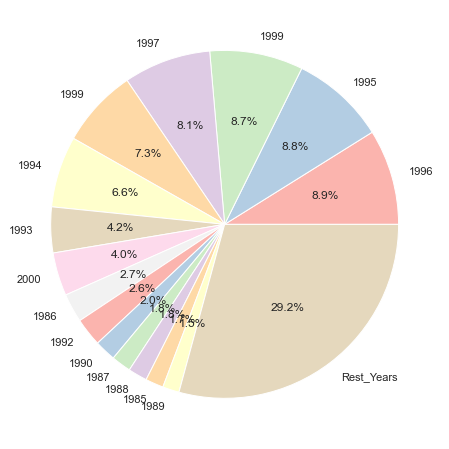

In [991]:
colors = sns.color_palette('Pastel1')
plt.figure(figsize=(15,8))
resto= 100-70.77
datos=year_pct.head(15)
datos.loc[16]=resto
#print(datos)
labels=[1996,1995,1999,1997,1999,1994,1993,2000,1986,1992,1990,1987,1988,1985,1989,"Rest_Years"]
plt.pie(datos, labels = labels,colors = colors, autopct='%1.1f%%')
plt.show()

###### Los tres años con mayor porcentaje de producciones (Movies) son : 1996, 1995 y 1999

##### Gráfico 2 - BoxPlot de distribución del Porcentaje de películas por año

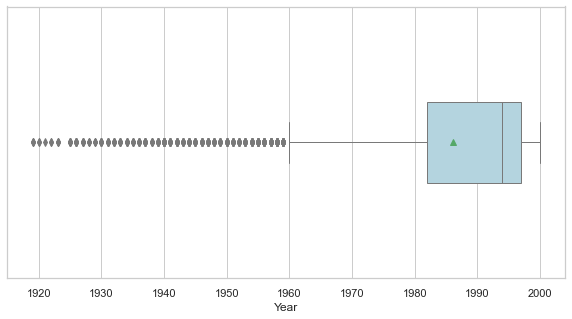

In [992]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x = df["Year"], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3, showmeans=True)

##### b.4) Función de densidad de la distribución del número de películas por año

##### Grafico 3 - Histograma y Función de Densidad (ajustada por KDE) de la las películas por años y el porcentaje de películas por años

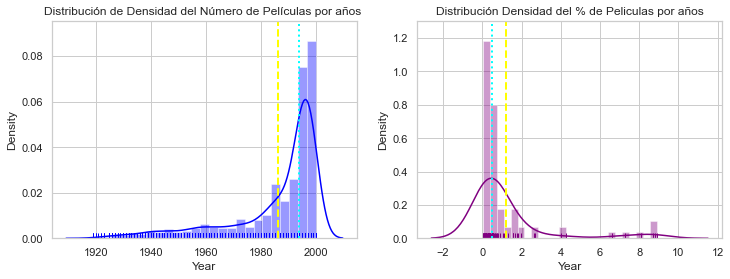

In [1000]:
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(12, 4))

# histograma del total de factura
sns.distplot(df['Year'], kde=True, rug=True, ax=axes[0], color="blue", bins=25)
# límea vertical de la media
axes[0].axvline(df['Year'].mean(), color='yellow', linewidth=2, linestyle="--")
# linea vertical de la mediana
axes[0].axvline(df['Year'].quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# título
axes[0].set_title("Distribución de Densidad del Número de Películas por años ")

# histograma de ratio de propinas
sns.distplot(year_pct, kde=True, rug=True, ax=axes[1], color="purple", bins=25)
# línea vertical de la media
axes[1].axvline(year_pct.mean(), color='yellow', linewidth=2, linestyle="--")
# línea vertical de la mediana
axes[1].axvline(year_pct.quantile(q=0.5), color='cyan', linewidth=2, linestyle=":")
# título
axes[1].set_title("Distribución Densidad del % de Peliculas por años");

###### KDE es la "Estimación de la densidad del kernel" y se utiliza para visualizar la densidad de probabilidad de variables de datos continuas y no paramétricas.
###### La función KDE produce un gráfico menos desordenado y suavizado de los datos, que resulta más interpretable.

#### c) Categorías por Géneros

In [1002]:
df.dtypes

id         int64
Movie     object
Genres    object
Year       int64
dtype: object

In [1003]:
categories = df["Genres"].str.split("|", expand=True)

In [1004]:
df["Genre A"]= categories[0]
df["Genre B"]= categories[1]
df["Genre C"]= categories[2]
df["Genre D"]= categories[3]

In [1005]:
df.head(5)

,id,Movie,Genres,Year,Genre A,Genre B,Genre C,Genre D
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None
4,5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None


##### d) Clasificación por Años y Géneros desagrupados

In [1006]:
genr=df[["Genre A","Genre B", "Genre C", "Genre D"]].stack().str.get_dummies().sum(level=0)
moviesCopy=df[['Movie','Year']].copy()
moviesGen= pd.concat([moviesCopy, genr], axis=1)
moviesGen.head(5)

,Movie,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jumanji,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1007]:
moviesGen.columns

Index(['Movie', 'Year', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [1008]:
moviesGenre=moviesGen.groupby('Year').aggregate(sum)
moviesGenre.tail(11)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,
1990,19,6,2,4,22,7,2,27,2,1,16,0,1,10,6,14,0,3
1991,6,4,2,3,24,1,1,26,3,0,3,2,4,9,6,7,1,0
1992,21,3,3,7,37,10,1,38,1,0,12,3,2,14,8,14,3,1
1993,25,10,4,12,47,8,5,81,3,1,9,3,7,18,10,22,5,2
1994,32,15,5,20,96,9,11,121,4,0,13,2,3,37,8,31,7,6
1995,45,25,8,22,89,18,22,158,4,1,16,4,8,49,18,43,12,4
1996,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1


##### e) Totales por Géneros 

In [1009]:
moviesGenre=moviesGenre.iloc[:,0:18]
agregadosGen= moviesGenre.sum().sort_values(ascending=False)
df_agreGen = pd.DataFrame(agregadosGen, columns=["Number_Films"]) 
df_agreGen

,Number_Films
Drama,1603
Comedy,1200
Action,503
Thriller,489
Romance,468
Horror,343
Adventure,283
Sci-Fi,273
Children's,251
Crime,211


In [1010]:
print("Total de clasificaciones por Género: ", df_agreGen["Number_Films"].sum())

Total de clasificaciones por Género:  6392


##### Gráfico 4 - Número de Películas clasificadas por Géneros 

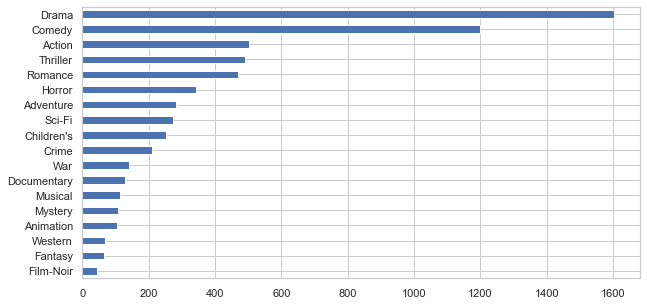

In [1011]:
plt.figure(figsize=(10,5))
moviesGenre.sum().sort_values(ascending=True).plot(kind='barh');

###### Los dos género con mayor nñumero de películas son Drama con 1603 y Comedia con 1200 , porque se corresponden con la primera categorización de género

##### f) Análisis por géneros de la década de los 90 (acumulan el % total de películas)

In [1012]:
moviesGenre['Year']= moviesGenre.index
moviesGenre.head(10)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
Year,,,,,,,,,,,,,,,,,,,
1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1919
1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1920
1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1921
1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1922
1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1923
1925,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,1,0,1925
1926,0,1,0,0,1,1,0,4,0,0,0,0,0,0,1,1,0,0,1926
1927,0,0,0,0,2,0,0,4,0,0,0,0,0,2,0,0,1,0,1927
1928,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1928


In [1013]:
YearXX = moviesGenre.loc[:, 'Year'] > 1989
df_XX = moviesGenre.loc[YearXX]
df_XX

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
Year,,,,,,,,,,,,,,,,,,,
1990,19,6,2,4,22,7,2,27,2,1,16,0,1,10,6,14,0,3,1990
1991,6,4,2,3,24,1,1,26,3,0,3,2,4,9,6,7,1,0,1991
1992,21,3,3,7,37,10,1,38,1,0,12,3,2,14,8,14,3,1,1992
1993,25,10,4,12,47,8,5,81,3,1,9,3,7,18,10,22,5,2,1993
1994,32,15,5,20,96,9,11,121,4,0,13,2,3,37,8,31,7,6,1994
1995,45,25,8,22,89,18,22,158,4,1,16,4,8,49,18,43,12,4,1995
1996,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1,1996
1997,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0,1997
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1,1998


In [1014]:
df_GenXX=df_XX.iloc[:, 0:18]
df_GenXX.rename(index={70:"1990", 71:"1991",72:"1992", 73:"1993",74:"1994", 75:"1995",76:"1996", 77:"1997",78:"1998", 79:"1999",80:"2000"}, 
              inplace=True)
df_GenXX

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,
1990,19,6,2,4,22,7,2,27,2,1,16,0,1,10,6,14,0,3
1991,6,4,2,3,24,1,1,26,3,0,3,2,4,9,6,7,1,0
1992,21,3,3,7,37,10,1,38,1,0,12,3,2,14,8,14,3,1
1993,25,10,4,12,47,8,5,81,3,1,9,3,7,18,10,22,5,2
1994,32,15,5,20,96,9,11,121,4,0,13,2,3,37,8,31,7,6
1995,45,25,8,22,89,18,22,158,4,1,16,4,8,49,18,43,12,4
1996,37,22,7,20,115,23,19,150,4,2,12,7,6,48,14,44,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,4,15,52,18,55,10,0
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,4,1


##### Gráfico 5 - Mapa de Calor del Número de películas por Género y Año en la década de los 90

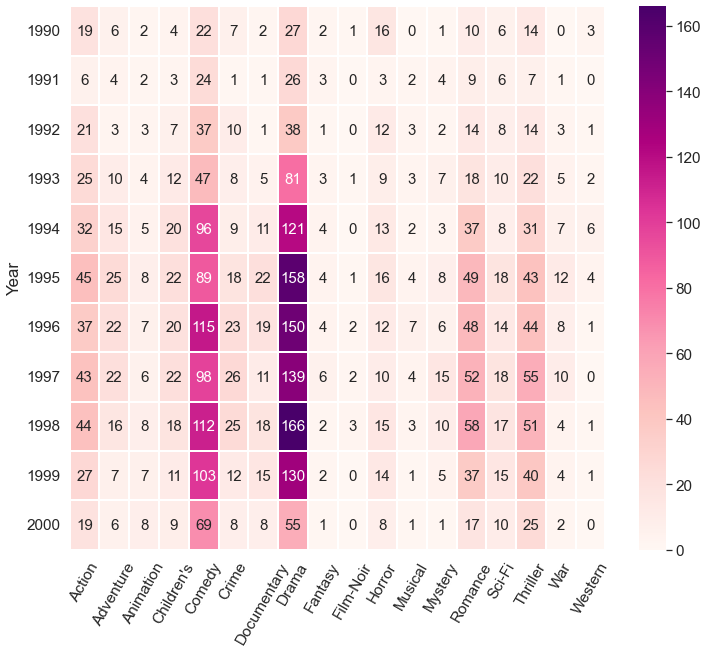

In [1017]:
df= pd.DataFrame(df_GenXX, columns=['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',
                                  'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War',
                                  'Western'])
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
a=sns.heatmap(df_GenXX, linewidths=2, linecolor='white', annot=True, annot_kws={"size": 15}, cmap="RdPu", fmt='.0f')
a.set_yticklabels(a.get_yticklabels(), rotation=0)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

###### Tal y como hemos visto en el gráfico anterior el número de películas por Género y año en la década de los 90, se concentra en dos categorías principales : Drama y Comedia
###### Los siguientes Generos con mayor concentración de películas en la década de los 90 por años son : Acción, Romance y Thriller

##### Gráfico 6 - Cluster de Géneros por Años en la década de los 90.

###### La función clustermap() de seaborn traza un mapa de calor agrupado jerárquicamente del conjunto de datos de matriz dado.
###### La agrupación en clústeres consiste en agrupar datos en función de las relaciones entre las variables y ayudan a obtener datos estructurados en el aprendizaje no supervisado.

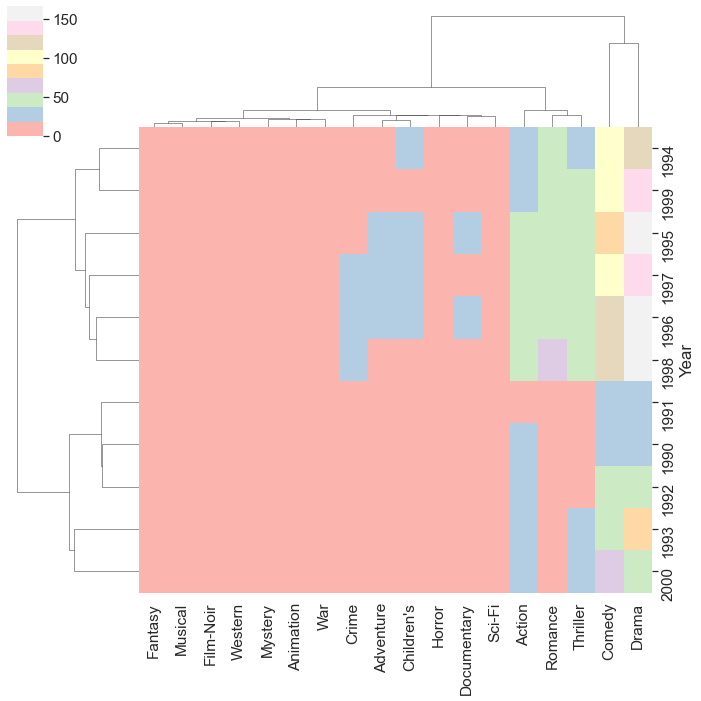

In [1030]:
#sns.clustermap(df_GenXX,cmap='Pastel1',)
g = sns.clustermap(df_GenXX, method="single", cmap="Pastel1")

##### g) Evolución del número de películas por géneros y años

In [1024]:
agregadosGen = moviesGen.sum()
type(agregadosGen)
#agregadosGen = pd.Series(agregadosGen, index=agregadosGen["Year"])

pandas.core.series.Series

##### Convertimos el Panda.serie.Series en un DataFrame

In [1025]:
df= pd.DataFrame(moviesGen,columns=["Year", "Action", "Adventure","Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir",
       "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War","Western"])

In [1031]:
dfGenre2 = df[["Year","Drama","Comedy","Action","Thriller","Romance","Horror","Adventure","Sci-Fi"]].copy()
dfGenre2_ok= dfGenre2.groupby('Year').aggregate(sum)
dfGenre2_ok.sort_values("Year", ascending=False)

,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,Sci-Fi
Year,,,,,,,,
2000,55,69,19,25,17,8,6,10
1999,130,103,27,40,37,14,7,15
1998,166,112,44,51,58,15,16,17
1997,139,98,43,55,52,10,22,18
1996,150,115,37,44,48,12,22,14
...,...,...,...,...,...,...,...,...
1923,1,2,0,0,0,0,0,0
1922,1,0,0,0,0,1,0,0
1921,0,0,1,0,0,0,0,0


##### Gráfico 7 - Evolución en la década de los 90 del número de películas por años y géneros: Drama, Comedy, Action, Thriller, Romance, Horror, Adventure and Sci-Fi

<AxesSubplot:xlabel='Year'>

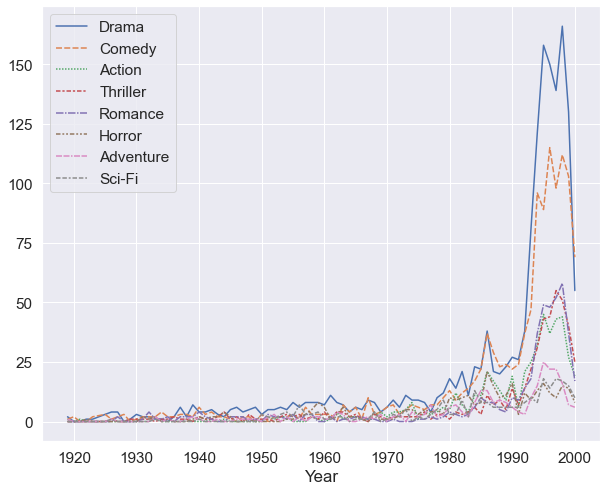

In [1040]:
plt.figure(figsize=(10,8))
sns.lineplot(data=dfGenre2_ok)

In [863]:
dfGenre3 = df[["Year","Children's","Crime","War","Documentary","Musical"]].copy()
dfGenre3_ok= dfGenre3.groupby('Year').aggregate(sum)
dfGenre3_ok.sort_values("Year", ascending=False)

,Children's,Crime,War,Documentary,Musical
Year,,,,,
2000,9,8,2,8,1
1999,11,12,4,15,1
1998,18,25,4,18,3
1997,22,26,10,11,4
1996,20,23,8,19,7
...,...,...,...,...,...
1923,0,0,0,0,0
1922,0,0,0,0,0
1921,0,0,0,0,0


##### Gráfico 8 - Evolución en la década de los 90 del número de películas por años y géneros: Children´s, Crime, War, Documentary and Musical

<AxesSubplot:xlabel='Year'>

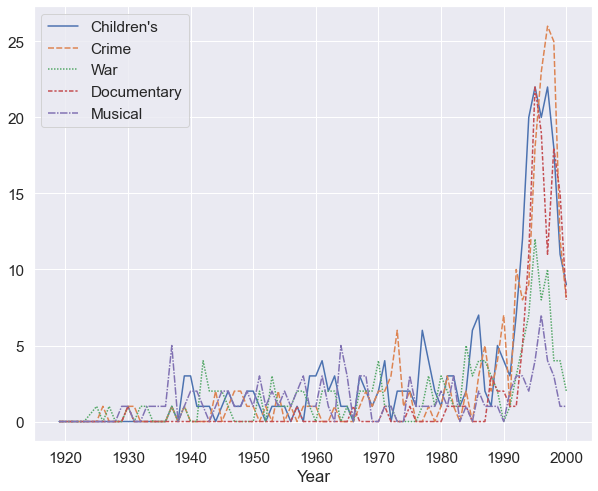

In [1042]:
plt.figure(figsize=(10,8))
sns.lineplot(data=dfGenre3_ok)

##### h) Comparación por pares de películas por géneros (Children's, Crime, War, Documentary and Musical) en la década de los 90

##### Gráfico 9 - PairGrid de 5 Géneros en la década de los 90

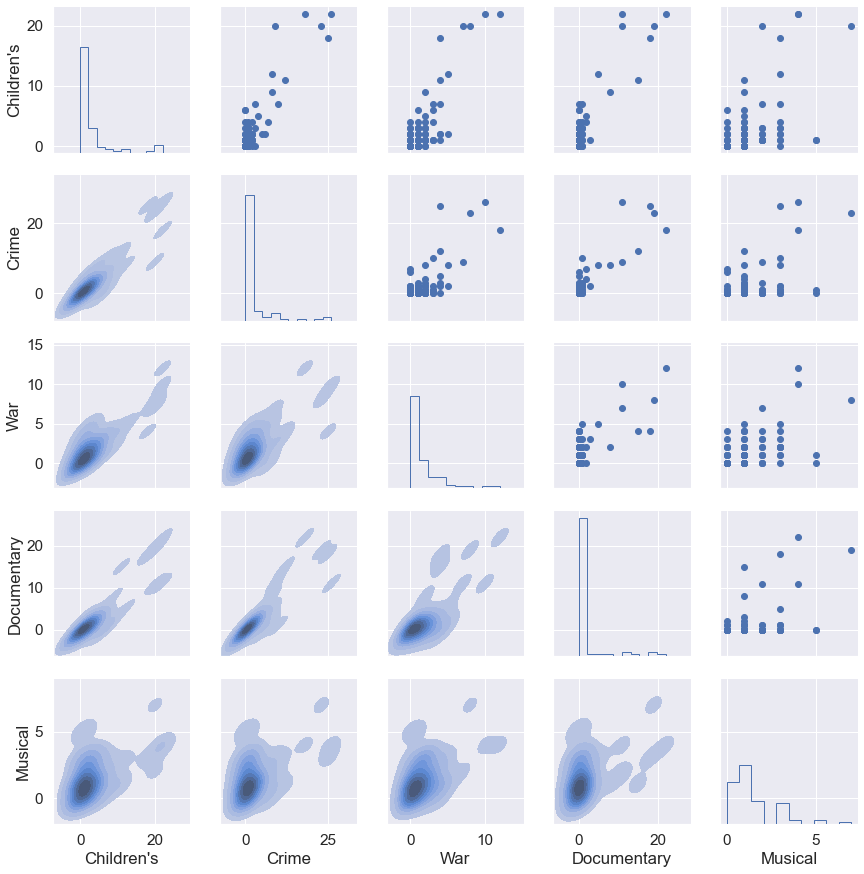

In [1037]:
# Mapeo de arriba, abajo y diagonal
g = sns.PairGrid(dfGenre3_ok) # crear una cuadricula
g.map_diag(plt.hist,histtype = 'step') #Histogramas en la diagonal
#g = g.map_diag(sns.kdeplot, linewidth=3, legend=True)# Plots de densidad kde en la diagonal
g.map_upper(plt.scatter) # Scatter plots en la parte superior
g.map_lower(sns.kdeplot, shade=True); # Plots de densidad kde en la parte inferior

###### En la diagonal se representan la relación de los datos por columnas comparados con sigo mismos en forma de histograma de "steps" y nos dan una idea de la concentración de los datos en un determinado valor.
###### Por debajo de la diagonal se representa la función de densidad KDE entre cada par de variables, siendo la parte más oscura la que representa la mayor concentración de probabilidad entre las dos variales
###### Por encima de la diagonal se representa la relación entre pares en función de los datos y son simétricos a la diagonal inferior
###### En ambos casos, tanto en las distribuciones de KDE como por puntos se puede ver que en general la tendencia de los pares de datos van en la misma dirección

In [ ]:
##### h) Correlación por géneros en la década de los 90

##### Gráfico 10 - Relación entre el número de peliculas por años y los Géneros principales en la década de los 90

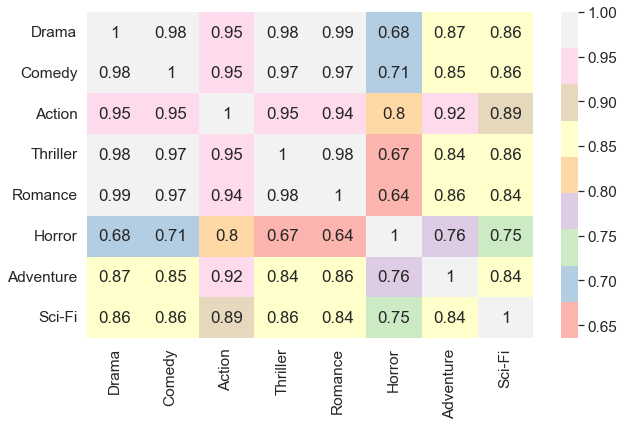

In [1050]:
plt.figure(figsize=(10,6))
sns.heatmap(dfGenre2_ok.corr(),cmap='Pastel1',annot=True);

##### Gráfico 11 - Relación entre el número de películas y los géneros secundarios en la década de los 90

###### Lo que nos está reflejando la matriz de correlaciones lineales es que para un mismo años existe la una elevada correlación en encontrar una película clasificada como género Drama y género Comedy, no tanto que exista una correlación explicativa entre ambos géneros, ya que son categorías excluyentes.

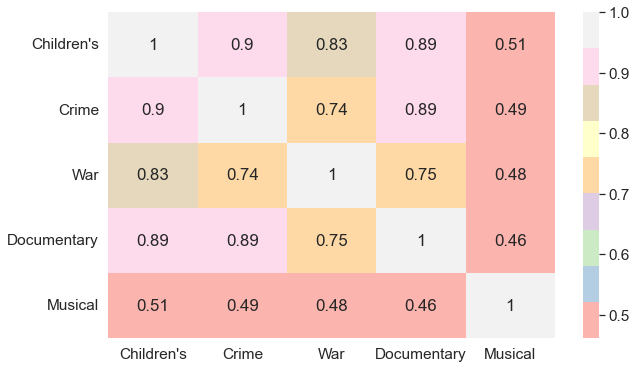

In [1051]:
plt.figure(figsize=(10,6))
sns.heatmap(dfGenre3_ok.corr(),cmap='Pastel1',annot=True);

##### De la misma forma encontramos qu existe una elevada probabilidad de encontrar una procción de películas de temática para Children's y del género de Crime o War (con datos del 0,9 y 0,89 respectivamente) 